In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving mhs_1226678152.xls to mhs_1226678152.xls


In [5]:
df = pd.read_excel(io.BytesIO(uploaded['mhs_1226678152.xls']))


In [6]:
X = df[['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['SystolicBP']

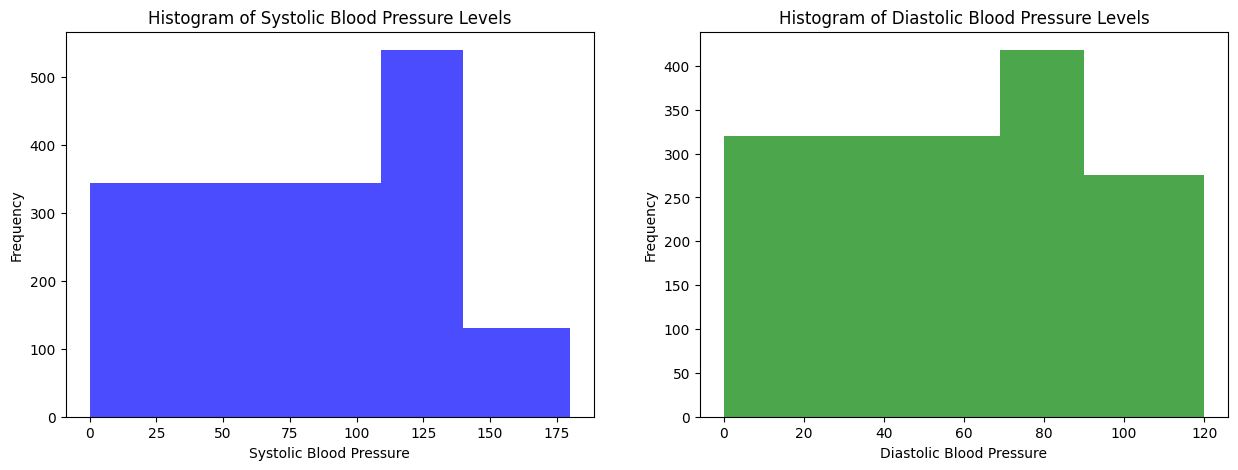

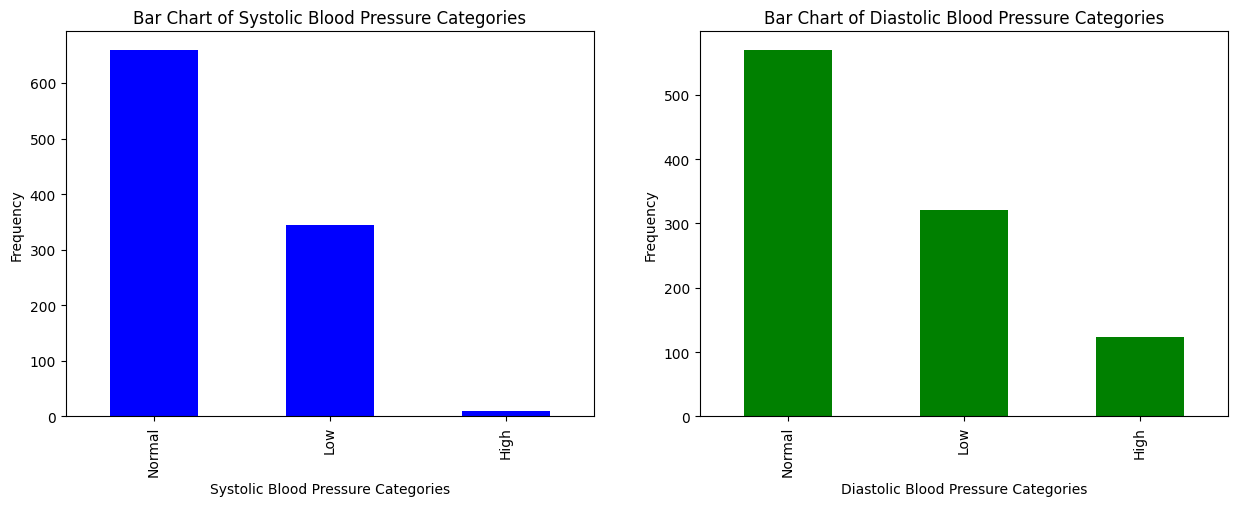

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


bins_systolic = [0, 109, 140, 180]
bins_diastolic = [0, 69, 90, 120]

#  systolic and diastolic blood pressure levels
df['systolic_category'] = pd.cut(df['SystolicBP'], bins=bins_systolic, labels=['Low', 'Normal', 'High'])
df['diastolic_category'] = pd.cut(df['DiastolicBP'], bins=bins_diastolic, labels=['Low', 'Normal', 'High'])

#  histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['SystolicBP'].plot(kind='hist', bins=bins_systolic, ax=axes[0], alpha=0.7, color='blue')
axes[0].set_title('Histogram of Systolic Blood Pressure Levels')
axes[0].set_xlabel('Systolic Blood Pressure')
axes[0].set_ylabel('Frequency')

df['DiastolicBP'].plot(kind='hist', bins=bins_diastolic, ax=axes[1], alpha=0.7, color='green')
axes[1].set_title('Histogram of Diastolic Blood Pressure Levels')
axes[1].set_xlabel('Diastolic Blood Pressure')
axes[1].set_ylabel('Frequency')

plt.show()

#  bar charts
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['systolic_category'].value_counts().plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Bar Chart of Systolic Blood Pressure Categories')
axes[0].set_xlabel('Systolic Blood Pressure Categories')
axes[0].set_ylabel('Frequency')

df['diastolic_category'].value_counts().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Bar Chart of Diastolic Blood Pressure Categories')
axes[1].set_xlabel('Diastolic Blood Pressure Categories')
axes[1].set_ylabel('Frequency')

plt.show()


In [43]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP_Category,systolic_category,diastolic_category
0,25,130,80,15.0,98.0,86,high risk,normal/normal,Normal,Normal
1,35,140,90,13.0,98.0,70,high risk,high/high,Normal,Normal
2,29,90,70,8.0,100.0,80,high risk,other,Low,Normal
3,30,140,85,7.0,98.0,70,high risk,other,Normal,Normal
4,35,120,60,6.1,98.0,76,low risk,other,Normal,Low
...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,other,Normal,Low
1010,55,120,90,18.0,98.0,60,high risk,other,Normal,Normal
1011,35,85,60,19.0,98.0,86,high risk,low/low,Low,Low
1012,43,120,90,18.0,98.0,70,high risk,other,Normal,Normal


In [34]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [9]:
linear_model = LinearRegression()

In [10]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [11]:
print(linear_model.intercept_)

150.5483502550701


In [13]:
coeff_df = pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,0.034930
DiastolicBP,0.965129
BS,0.568454
BodyTemp,-1.190664
HeartRate,0.005433


In [14]:
predictions = linear_model.predict(X_test)

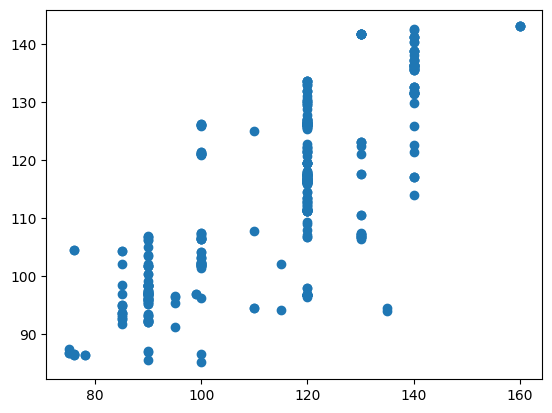

In [15]:
plt.scatter(y_test,predictions)

<ipython-input-16-38abd0d90de5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50); # residual histogram


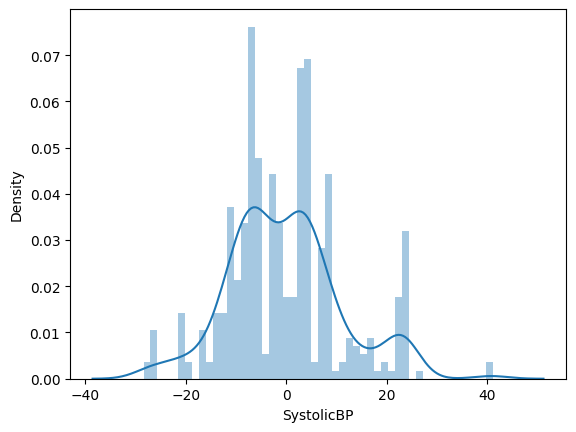

In [16]:
sns.distplot((y_test-predictions),bins=50); # residual histogram

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [19]:
print('Explained Variance:', pca.explained_variance_ratio_)

Explained Variance: [0.39913687 0.22600433]


In [74]:
age_groups = df.groupby(pd.cut(df['Age'], bins=[20, 29, 39, 49, 59, 69, 79]))
age_label = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

In [75]:
mean_hr = age_groups['HeartRate'].mean()

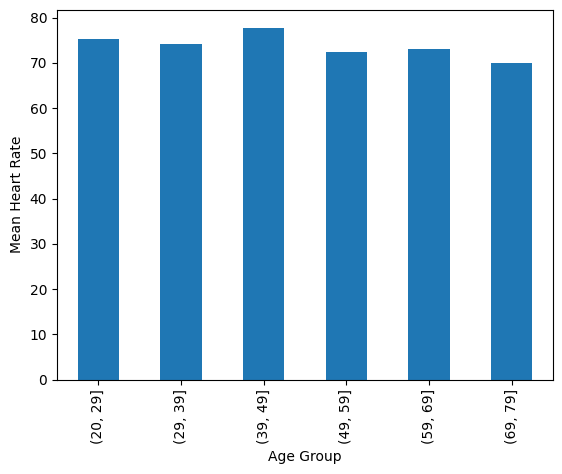

In [76]:
mean_hr.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Mean Heart Rate')
plt.show()

In [85]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

systolic_bp = df['SystolicBP'].values.reshape(-1, 1)

In [92]:

\
inertia = []
K = range(1, 6)  
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(systolic_bp)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

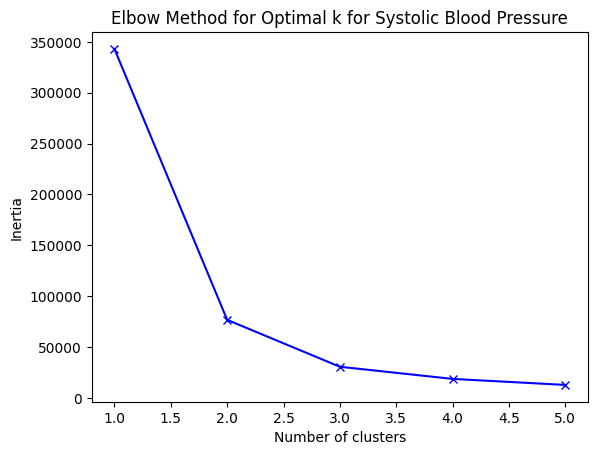

In [25]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k for Systolic Blood Pressure')
plt.show()

In [88]:
inertia

[343107.15680473414,
 76730.18529156563,
 30637.303061202794,
 18703.21879455397,
 12791.284093576609]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

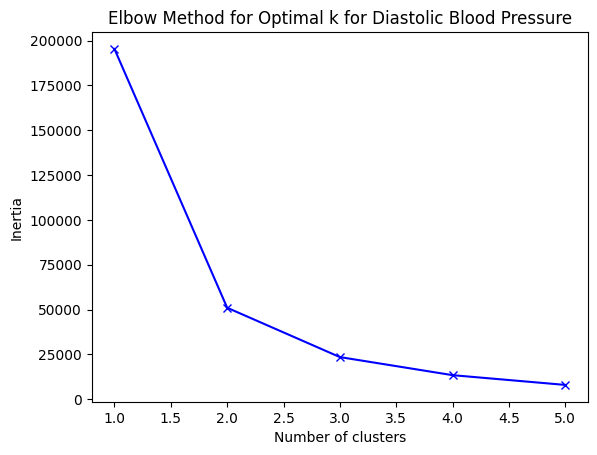

In [27]:

diastolic_bp = df['DiastolicBP'].values.reshape(-1, 1)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(diastolic_bp)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k for Diastolic Blood Pressure')
plt.show()

In [84]:
inertia

[195321.92209072955,
 51002.84397944347,
 23496.27078327818,
 13414.727120883766,
 7978.798195142123]

In [28]:
#  correlation between age and systolic blood pressure
correlation = df['Age'].corr(df['SystolicBP'])
print(f'Correlation between age and systolic BP: {correlation}')

# Interpret the result
if correlation > 0:
    if correlation > 0.7:
        print("There is a strong positive correlation between age and systolic blood pressure.")
    else:
        print("There is a weak positive correlation between age and systolic blood pressure.")
elif correlation < 0:
    if correlation < -0.7:
        print("There is a strong negative correlation between age and systolic blood pressure.")
    else:
        print("There is a weak negative correlation between age and systolic blood pressure.")
else:
    print("There is no correlation between age and systolic blood pressure.")


Correlation between age and systolic BP: 0.41604544797473325
There is a weak positive correlation between age and systolic blood pressure.


In [81]:
from mlxtend.frequent_patterns import apriori, association_rules

# function to categorize blood pressure levels
def categorize_bp(systolic, diastolic):
    if systolic >= 140 and diastolic >= 90:
        return 'high/high'
    elif 110 <= systolic < 140 and 70 <= diastolic < 90:
        return 'normal/normal'
    elif systolic < 110 and diastolic < 70:
        return 'low/low'
    else:
        return 'other'


df['BP_Category'] = df.apply(lambda row: categorize_bp(row['SystolicBP'], row['DiastolicBP']), axis=1)


bp_categories_encoded = pd.get_dummies(df['BP_Category'])


frequent_itemsets = apriori(bp_categories_encoded, min_support=0.2, use_colnames=True)




In [78]:
frequent_itemsets

,support,itemsets
0,0.266272,(low/low)
1,0.335306,(normal/normal)
2,0.283037,(other)


In [32]:
bp_category_counts = df['BP_Category'].value_counts()
print(bp_category_counts)


normal/normal    340
other            287
low/low          270
high/high        117
Name: BP_Category, dtype: int64


In [82]:
import pandas as pd



def calculate_metrics(systolic_condition, diastolic_condition):
    support_systolic = len(df[systolic_condition]) / len(df)
    support_diastolic = len(df[diastolic_condition]) / len(df)
    support_systolic_diastolic = len(df[systolic_condition & diastolic_condition]) / len(df)

    confidence = support_systolic_diastolic / support_systolic
    conviction = (1 - support_diastolic) / (1 - confidence)
    lift = confidence / support_diastolic

    return confidence, conviction, lift

# High/High
high_systolic = df['SystolicBP'] > 130
high_diastolic = df['DiastolicBP'] > 80

confidence_high, conviction_high, lift_high = calculate_metrics(high_systolic, high_diastolic)

# Normal/Normal
normal_systolic = (df['SystolicBP'] <= 130) & (df['SystolicBP'] >= 90)
normal_diastolic = (df['DiastolicBP'] <= 80) & (df['DiastolicBP'] >= 60)

confidence_normal, conviction_normal, lift_normal = calculate_metrics(normal_systolic, normal_diastolic)

# Low/Low
low_systolic = df['SystolicBP'] < 90
low_diastolic = df['DiastolicBP'] < 60

confidence_low, conviction_low, lift_low = calculate_metrics(low_systolic, low_diastolic)

print(f"High/High:\nConfidence: {confidence_high}\nConviction: {conviction_high}\nLift: {lift_high}\n")
print(f"Normal/Normal:\nConfidence: {confidence_normal}\nConviction: {conviction_normal}\nLift: {lift_normal}\n")
print(f"Low/Low:\nConfidence: {confidence_low}\nConviction: {conviction_low}\nLift: {lift_low}")


High/High:
Confidence: 0.8947368421052632
Conviction: 6.445759368836293
Lift: 2.7830158217629966

Normal/Normal:
Confidence: 0.7189460476787954
Conviction: 1.315841610312764
Lift: 1.1408627423259758

Low/Low:
Confidence: 0.38095238095238093
Conviction: 1.5373236231224396
Lift: 7.88338192419825


diastolic_category  Low  Normal  High
systolic_category                    
Low                 270      74     0
Normal               51     496   113
High                  0       0    10


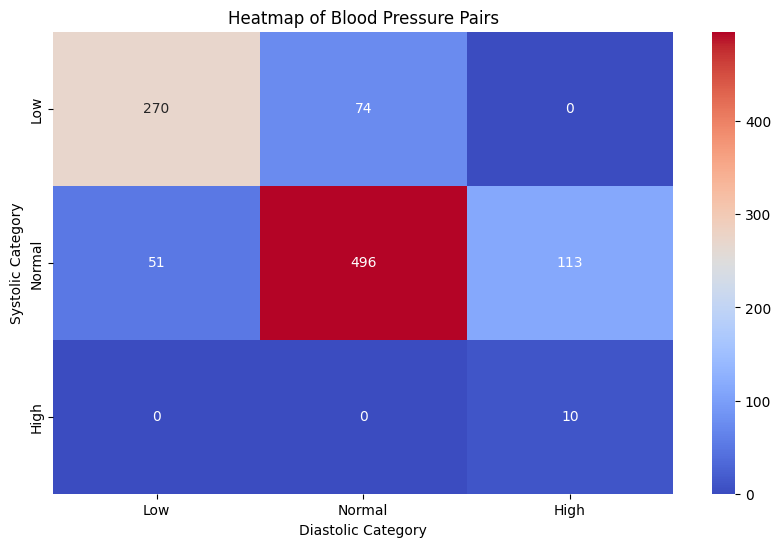

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


contingency_table = pd.crosstab(df['systolic_category'], df['diastolic_category'])


print(contingency_table)

#  heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap of Blood Pressure Pairs")
plt.xlabel("Diastolic Category")
plt.ylabel("Systolic Category")
plt.show()


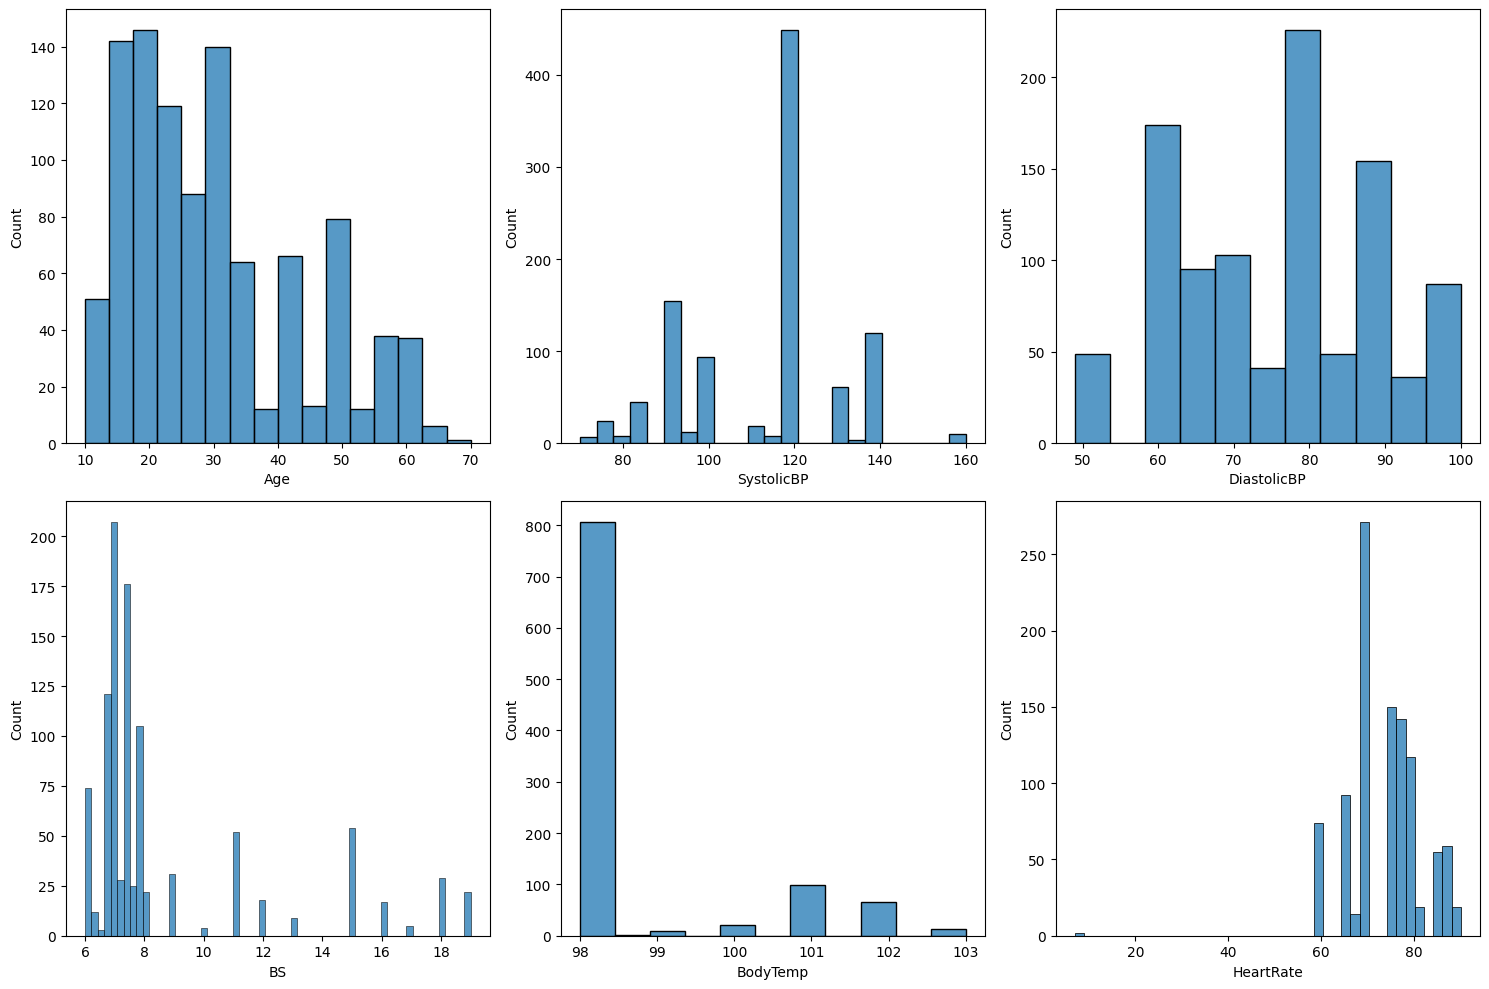

In [47]:
variables = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, var in enumerate(variables):
    sns.histplot(data=df, x=var, ax=axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()


In [64]:
# mean blood pressure
df['MBP'] = (df['SystolicBP'] + df['DiastolicBP']) / 2

# Define age groups
age_bins = [20, 29, 39, 49, 59, 69, 79, 89]



df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


mean_bp_by_age_group = df.groupby('AgeGroup')['MBP'].mean()


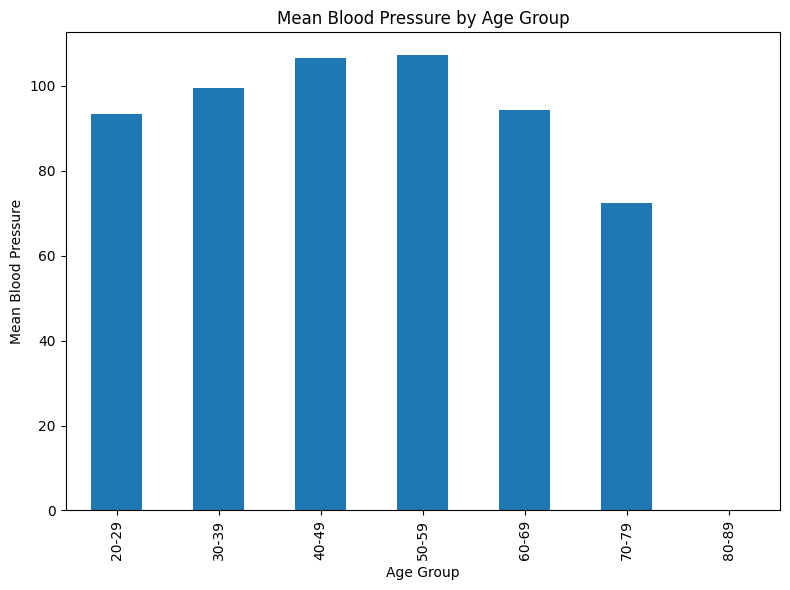

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

mean_bp_by_age_group.plot(kind='bar', ax=ax)

ax.set_xlabel('Age Group')
ax.set_ylabel('Mean Blood Pressure')
ax.set_title('Mean Blood Pressure by Age Group')

plt.tight_layout()
plt.show()


In [54]:

mean_systolic_by_age_group = df.groupby('AgeGroup')['SystolicBP'].mean()
mean_diastolic_by_age_group = df.groupby('AgeGroup')['DiastolicBP'].mean()


mean_bp_by_age_group = pd.DataFrame({'Mean Systolic BP': mean_systolic_by_age_group,
                                     'Mean Diastolic BP': mean_diastolic_by_age_group})


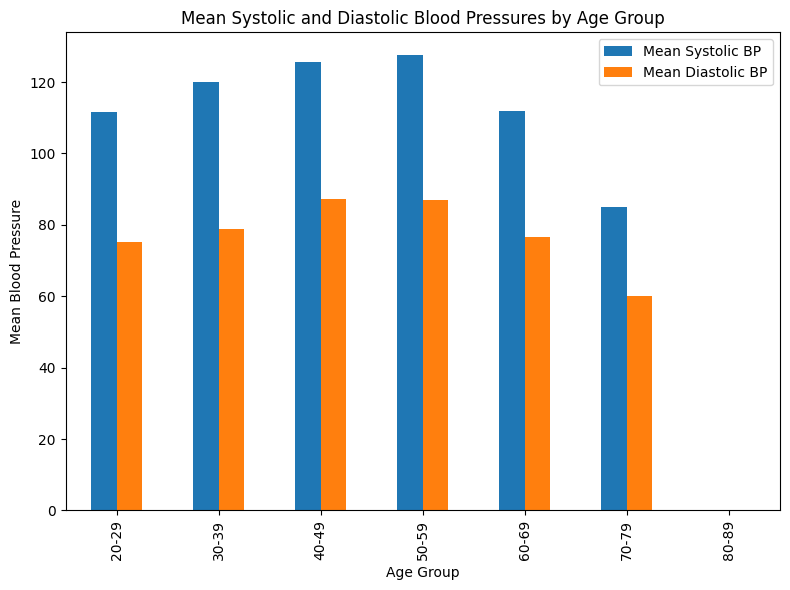

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))

mean_bp_by_age_group.plot(kind='bar', ax=ax)

ax.set_xlabel('Age Group')
ax.set_ylabel('Mean Blood Pressure')
ax.set_title('Mean Systolic and Diastolic Blood Pressures by Age Group')

plt.tight_layout()
plt.show()


In [100]:
from sklearn.preprocessing import MinMaxScaler

new_patient_data = pd.DataFrame({
    'Age': [45],
    'SystolicBP': [130],
    'DiastolicBP': [80],
    'BS': [95],
    'BodyTemp': [98.6],
    'HeartRate': [70]
})


optimal_clusters = 3 
kmeans_systolic = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_systolic.fit(systolic_bp)

# New patient data
new_patient_systolic = pd.DataFrame({
    'SystolicBP': [130]
})

# Predict the cluster for the new patient's diastolic blood pressure
predicted_systolic_cluster = kmeans_systolic.predict(new_patient_systolic)
print(f"The predicted cluster for the new patient's diastolic blood pressure is: {predicted_systolic_cluster[0]}")



The predicted cluster for the new patient's diastolic blood pressure is: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


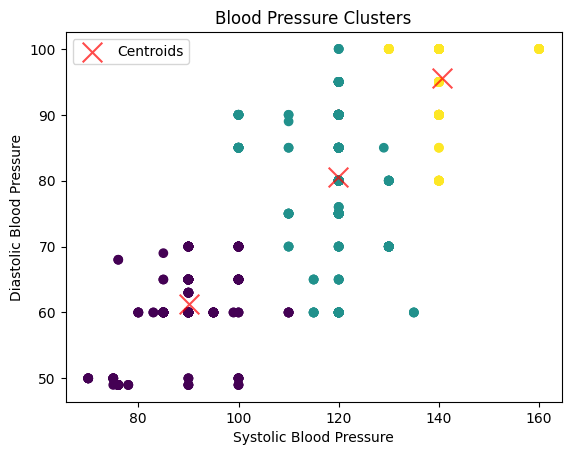

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)


cluster_data= df[['SystolicBP', 'DiastolicBP']]
kmeans.fit(cluster_data)


labels = kmeans.labels_


plt.scatter(df['SystolicBP'], df['DiastolicBP'], c=labels, cmap='viridis')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.7, label='Centroids')


plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Blood Pressure Clusters')


plt.legend()


plt.show()
